## 머신러닝에 같은 데이터와 타깃을 주고 훈련한 다음, 같은 데이터로 테스트하면 모두 맞히는 것이 당연, 연습문제와 시험문제가 달라야 학생의 능력을 평가할 수 있듯이 훈련 데이터와 평가에 사용할 데이터가 달라야 함 ##
->즉, 평가를 위해 또 다른 데이터를 준비하거나 준비된 데이터 중에 일부를 떼어내어 활용하는 것, 평가에 사용하는 데이터를 테스트 세트, 훈련에 사용되는 데이터를 훈련 세트(머신러닝의 정확한 평가를 위해선 테스트 세트와, 훈련 세트가 따로 준비되어 있어야함)

In [1]:
#지난번은 훈련세트와 데이터셋이 같았음, 이번엔 훈련데이터의 일부를 떼어내어 테스트셋 사용

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [5]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]

In [6]:
fish_target = [1]*35 + [0]*14

In [7]:
#도미35+빙어14 = 총 49개의 데이터 중 35개를 훈련세트, 나머지 14개를 테스트셋으로 사용->도미와 빙어 따로?

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [8]:
fish_data[4] #5번째 데이터

[29.0, 430.0]

In [9]:
fish_data[0:5]

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]

In [10]:
fish_data[44:]

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]

In [12]:
#훈련세트로 입력값 중 0부터 34번째 인덱스까지 사용
train_input = fish_data[:35]

In [13]:
#훈련세트로 타깃값 중 0부터 34번째 인덱스까지 사용
train_target = fish_target[:35]

In [14]:
#테스트세트로 입력값 중 35부터 마지막 인덱스까지 사용
test_input = fish_data[35:]

In [15]:
#테스트세트로 타깃값 중 35부터 마지막 인덱스까지 사용
test_target = fish_target[35:]

In [16]:
kn = kn.fit(train_input, train_target)#훈련
kn.score(test_input, test_target)#평가

0.0

In [17]:
#여기서 문제점, 빙어없이 훈련했는데 빙어를 분류할 수 없음, 도미와 빙어를 적절히 섞어야 함
#이것을 샘플링 편향이라고 함

### 샘플링 골고루 섞는 법 ###
numpy사용

In [18]:
import numpy as np

In [20]:
#리스트를 배열로 바꾸기
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [22]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [23]:
input_arr.shape

(49, 2)

In [24]:
np.random.seed(42)#난수생성, seed는 랜덤생성할 값 고정, 괄호안은 정수 초깃값 생성으로 아무거나 넣어도 됨

In [27]:
index = np.arange(49)#0에서부터 48까지 1씩 증가하는 인덱스를 간단히 만들 수 있음

In [28]:
np.random.shuffle(index)#index 생성한 값을 랜덤하게 섞음

In [29]:
index

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2, 37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

In [30]:
input_arr[[1,3]]

array([[ 26.3, 290. ],
       [ 29. , 363. ]])

In [31]:
# 앞에서 만든 index 배열의 35개를 입력, 타깃에 전달하여 훈련 세트로 만듬
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [32]:
input_arr[13], train_input[0]#index의 13이 첫번째 값이므로 원래데이터의 14번째 값이 들어가 있음

(array([ 32., 340.]), array([ 32., 340.]))

In [34]:
test_input = input_arr[index[35:]]#앞에서 만든 idex배열의 나머지 값을 테스트에 전달

In [35]:
test_target = target_arr[index[35:]]

In [36]:
test_input

array([[ 10.6,   7. ],
       [  9.8,   6.7],
       [ 35. , 680. ],
       [ 11.2,   9.8],
       [ 31. , 475. ],
       [ 34.5, 620. ],
       [ 33.5, 610. ],
       [ 15. ,  19.9],
       [ 34. , 575. ],
       [ 30. , 390. ],
       [ 11.8,   9.9],
       [ 32. , 600. ],
       [ 36. , 850. ],
       [ 11. ,   9.7]])

In [37]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [38]:
# 훈련세트와 테스트 세트에 도미와 빙어가 잘 섞여 있는지 산점도로 그려보기

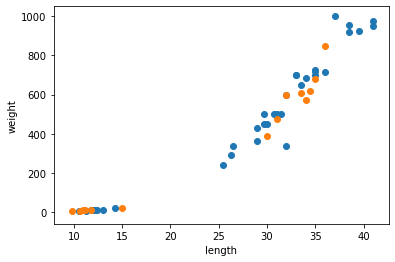

In [41]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:, 1])#도미(0)랑 빙어(1)
plt.scatter(test_input[:, 0], test_input[:, 1])#도미(0)랑 빙어(1)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
#파랑색 훈련, 주황색 테스트

In [42]:
#fit 메서드 실행할 때마다 클래스 객에는 이전에 학습한 걸 지우므로, 새 객체 만들어도 되지만 여기선 그냥 사용
kn = kn.fit(train_input, train_target)

In [43]:
kn.score(test_input, test_target)

1.0

In [44]:
#실제 타깃 확인 
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [45]:
test_target
#동일함, array는 넘파이 배열을 의미함
# 사이킷런 모델의 입력과 출력은 모두 넘파이 배열

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

## 훈련세트: 모델을 사용할 떄 훈련 데이터가 클수록 좋으므로 테스트 세트를 제외한 모든 데이터 사용, 테스트세트: 전체 데이터에서 20~30%사용, 전체 데이터가 크면 1%만 사용해도 됨##

